# Importing and Understanding Data

In [3663]:
#Library importing and reason

import numpy as np
import pandas as pd

#import plot
import matplotlib.pyplot as plt

#test_train_split
from sklearn.model_selection import train_test_split

#pairwise correlation check
import seaborn as sns

#Scaling with normalisation minMaxscaling 
from sklearn.preprocessing import MinMaxScaler

#RFE : automated way of selecting variables
from sklearn.feature_selection import RFE

#Linear regression from statsmodel
import statsmodels.api as sm

#Linear regression from sklearn
from sklearn.linear_model import LinearRegression

#R^2 evaluation
from sklearn.metrics import r2_score

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3664]:
#load the data
df=pd.read_csv("Linear_assignment/day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3665]:
#dropping the variables mentioned in the pdf as these won't be helping in anything
df_ad = df.drop(['instant','dteday','casual','registered'], axis = 1)

In [3666]:
df_ad.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [3667]:
#cnt is our target and other variables are worth looking into
df_ad.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [3668]:
df_ad.shape

(730, 12)

In [3669]:
#None of the data cell is empty.
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [3670]:
#Check the closness of mean and the median, if close then it's a nice spread
df_ad.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [3671]:
#Checking the mean and median above in the describe that there is no such outliers still we will check them.
#Break the vars into: num_vars and cat_vars and target_var

target_var = ['cnt']
num_vars = ['temp','atemp','hum', 'windspeed']
cat_vars = ['season', 'yr' ,'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

'\nif we check the temp and atemp against cnt it makes linear sense.\nnot so much in humidity and windspeed, but we can put linear regression.\n'

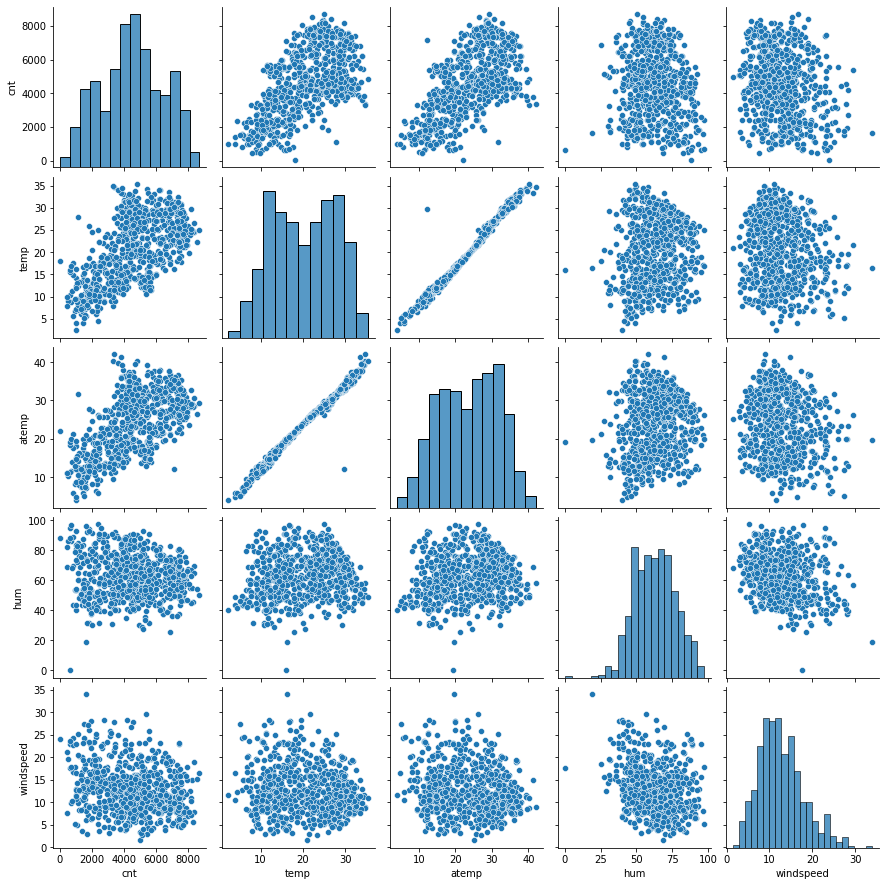

In [3672]:
#Plot the scatter plot, visualise the data for the numericals
sns.pairplot(df_ad[target_var + num_vars])

'''
if we check the temp and atemp against cnt it makes linear sense.
not so much in humidity and windspeed, but we can put linear regression.
'''

# Data Preparation

In [3673]:
#Drop outliers if any. Because the linear regression gets affected by the outliers.
##odd 25 rows had to be dropped and all of the rows were related to the windspeed outliers

'''
IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle.
An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.
'''

for var in num_vars:
    q1,q3 = np.percentile(df_ad[var],[25,75])
    #print(q1,q3)
    iqr = q3 - q1
    # Upper bound
    upper = np.where(df_ad[var] >= (q3+1.5*iqr))
    # Lower bound
    lower = np.where(df_ad[var] <= (q1-1.5*iqr))
    
    print(var,upper)
    print(var,lower)
    
    ''' Removing the Outliers '''
    df_ad.drop(upper[0], inplace = True)
    df_ad.drop(lower[0], inplace = True)
    
print("New Shape: ", df_ad.shape)
    

temp (array([], dtype=int64),)
temp (array([], dtype=int64),)
atemp (array([], dtype=int64),)
atemp (array([], dtype=int64),)
hum (array([], dtype=int64),)
hum (array([49, 68]),)
windspeed (array([ 44,  91,  92, 290, 380, 405, 418, 429, 430, 447, 663, 718]),)
windspeed (array([], dtype=int64),)
New Shape:  (716, 12)


- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)  0 Not a holiday, 1 is holiday
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

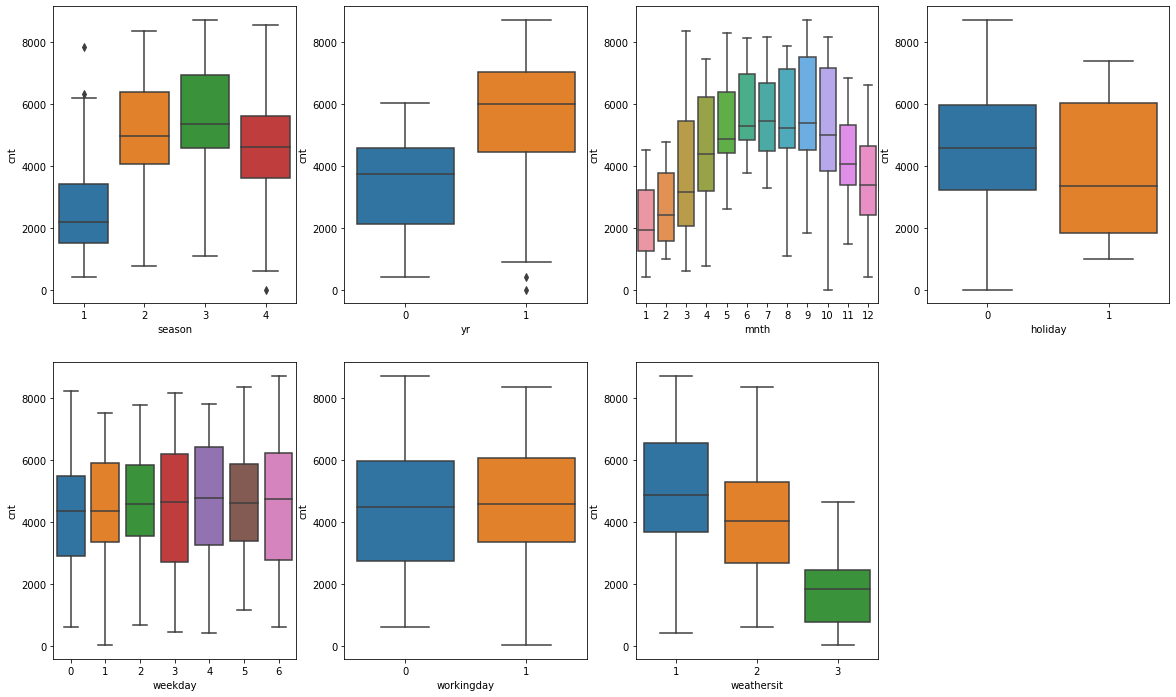

In [3674]:
#Plotting the categorical variables.

plt.figure(figsize=(20, 12))
'''
Following are the categorical variables agains the target variable:
'season', 'yr' ,'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'
'''

plt.subplot(2,4,1)
#The cnt increased in fall
sns.boxplot(x = 'season', y = 'cnt', data = df_ad)
plt.subplot(2,4,2)
#0 is 2018 and 1 is 2019 : The cnt increased in 2019
sns.boxplot(x = 'yr', y = 'cnt', data = df_ad)
plt.subplot(2,4,3)
#The median of july and september is higher 
sns.boxplot(x = 'mnth', y = 'cnt', data = df_ad)
plt.subplot(2,4,4)
#Mostly utilization is on the non holiday than on holiday, that also involves weekend. These holidays are public ones
sns.boxplot(x = 'holiday', y = 'cnt', data = df_ad)
plt.subplot(2,4,5)
#Almost used on all the days, no such difference in the median
sns.boxplot(x = 'weekday', y = 'cnt', data = df_ad)
plt.subplot(2,4,6)
#Here weekend + holidays are shown as 0, else 1. This is better than the holidays only.
sns.boxplot(x = 'workingday', y = 'cnt', data = df_ad)
plt.subplot(2,4,7)
#Nobody utilized the service in 4th condition, mostly used in clear.
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_ad)
plt.show()

In [3675]:
#In the cat_vars too there must be a division between the binary categories and the levels category
def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif

level_cat_vars = ['season','mnth', 'weekday', 'weathersit']
binary_cat_vars = Diff(cat_vars, level_cat_vars)
binary_cat_vars

['yr', 'holiday', 'workingday']

In [3676]:
#Transform the levels from mere numbers to the actual level column names for dummy variables
import calendar
df_ad['season'] = df_ad['season'].map({1: 'spring', 2: 'summer', 3:"fall", 4:"winter"})
df_ad['mnth'] = df_ad['mnth'].apply(lambda x: calendar.month_abbr[x])
df_ad['weekday'] = df_ad['weekday'].apply(lambda x: calendar.day_name[x])
df_ad['weathersit'] = df_ad['weathersit'].map({1: 'clear', 2: 'mist_cloud', 3:"snow_rain", 4:"heavy_thunder"})
df_ad.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,mist_cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,mist_cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Dummy Variables

In [3677]:
#Level encoding for the binary_cat_vars
#Already the binary_cat_vars are level encoded as they only contain 0 and 1.
#Let's proceed towards the dummy variables
for dummy_var in level_cat_vars:
    status = pd.get_dummies(df_ad[dummy_var], drop_first = True)
    
    df_ad = pd.concat([df_ad, status], axis = 1)

# Now let's see the head of our dataframe.
df_ad.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,mist_cloud,snow_rain
0,spring,0,Jan,0,Sunday,0,mist_cloud,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,spring,0,Jan,0,Monday,0,mist_cloud,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,spring,0,Jan,0,Tuesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Wednesday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Thursday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [3678]:
#Now we can drop the original columns whose dummy variables we created
df_ad.drop(level_cat_vars, axis = 1, inplace = True)
df_ad.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,mist_cloud,snow_rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


# Splitting the Data into Training and Testing Sets

In [3679]:
#Splitting the train and test data (rename back)
df = df_ad

df_train, df_test = train_test_split(df_ad, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(501, 30)
(215, 30)


# #Rescaling the Features
We will use MinMax scaling.

In [3680]:
#Normalisation on the train data
#1. Instantiate an object
scaler = MinMaxScaler()

#2. Fit on data: Already we have separated 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,mist_cloud,snow_rain
728,1,0,0,0.252441,0.204242,0.293114,0.821145,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
541,1,0,1,0.733702,0.689995,0.126342,0.813363,7442,0,0,...,0,0,0,0,0,0,0,1,0,0
116,0,0,1,0.719799,0.663818,0.826912,0.724732,3872,0,1,...,0,0,0,0,0,1,0,0,1,0
719,1,0,1,0.343347,0.298002,0.404296,0.880235,3623,1,0,...,0,0,0,1,0,0,0,0,1,0
496,1,0,0,0.648145,0.623239,0.288693,0.251927,7429,0,1,...,0,0,0,0,1,0,0,0,0,0


In [3681]:
#Check the sclaing range
df_train[num_vars].describe()

,temp,atemp,hum,windspeed
count,501.000000,501.000000,501.000000,501.000000
mean,0.556118,0.524340,0.516715,0.419335
std,0.235652,0.218436,0.209661,0.194302
min,0.000000,0.000000,0.000000,0.000000
25%,0.343347,0.328399,0.358813,0.281488
50%,0.558310,0.537073,0.520530,0.388802
75%,0.766857,0.707754,0.673406,0.530353
max,1.000000,1.000000,1.000000,1.000000


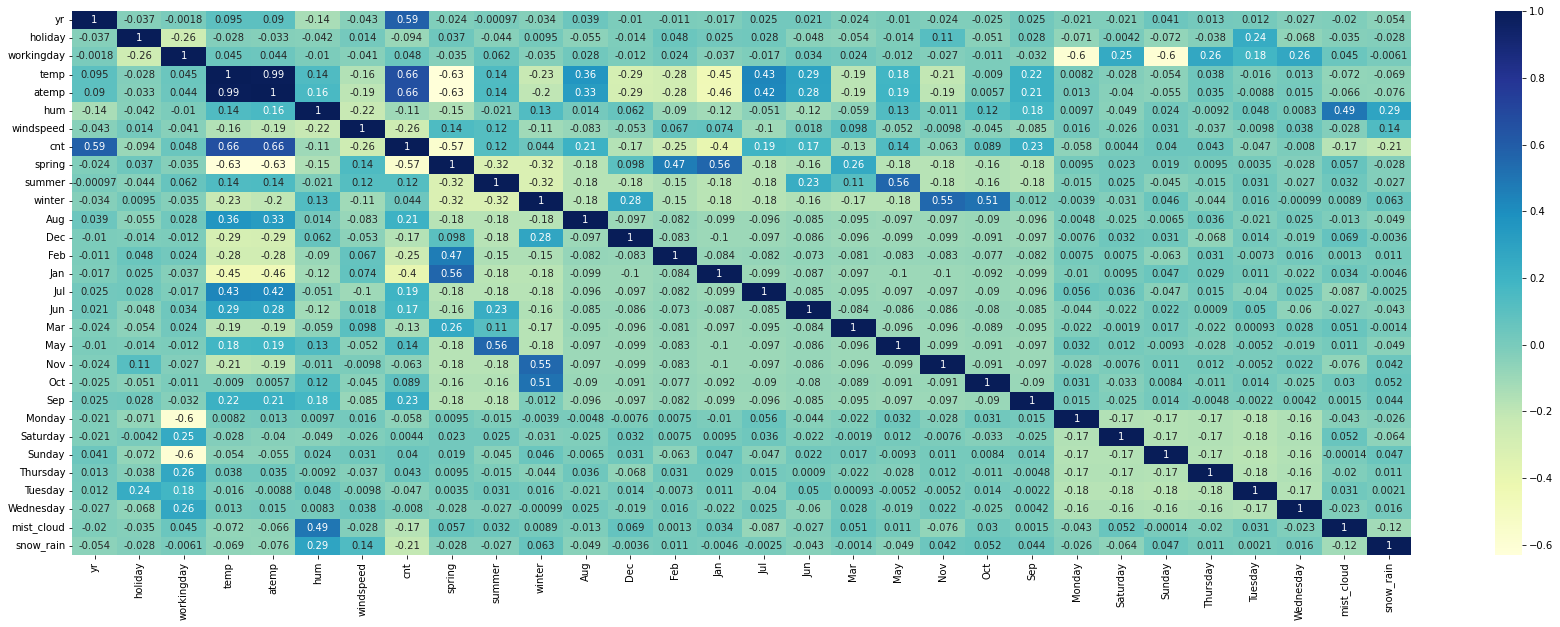

In [3682]:
#Let's put up a heatmap to estimate the number of variables required
plt.figure(figsize = (30, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3683]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,mist_cloud,snow_rain
728,1,0,0,0.252441,0.204242,0.293114,0.821145,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
541,1,0,1,0.733702,0.689995,0.126342,0.813363,7442,0,0,...,0,0,0,0,0,0,0,1,0,0
116,0,0,1,0.719799,0.663818,0.826912,0.724732,3872,0,1,...,0,0,0,0,0,1,0,0,1,0
719,1,0,1,0.343347,0.298002,0.404296,0.880235,3623,1,0,...,0,0,0,1,0,0,0,0,1,0
496,1,0,0,0.648145,0.623239,0.288693,0.251927,7429,0,1,...,0,0,0,0,1,0,0,0,0,0


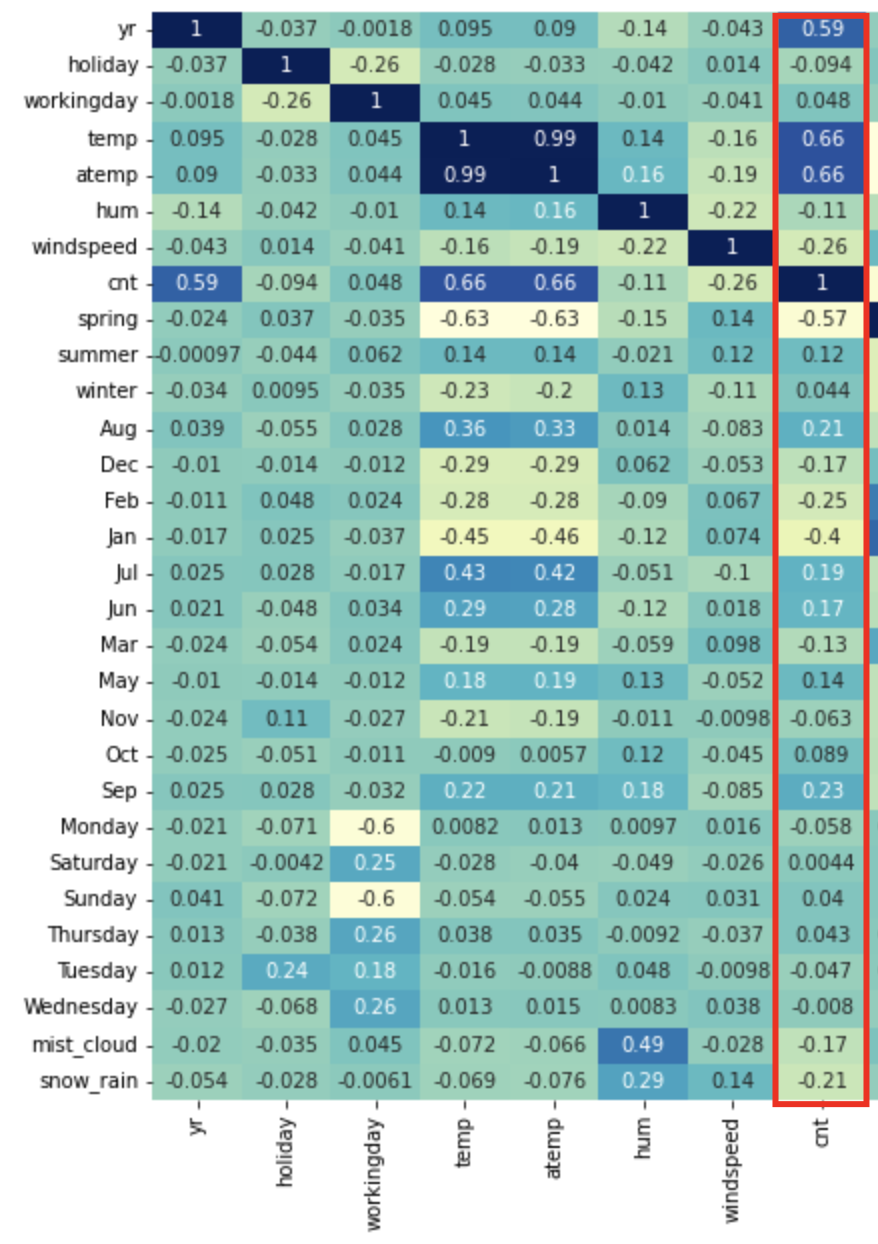

# Building our model

In [3684]:
y_train = df_train.pop('cnt')
X_train = df_train

print(y_train.head())
print(X_train.head())

728    1796
541    7442
116    3872
719    3623
496    7429
Name: cnt, dtype: int64
     yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
728   1        0           0  0.252441  0.204242  0.293114   0.821145       1   
541   1        0           1  0.733702  0.689995  0.126342   0.813363       0   
116   0        0           1  0.719799  0.663818  0.826912   0.724732       0   
719   1        0           1  0.343347  0.298002  0.404296   0.880235       1   
496   1        0           0  0.648145  0.623239  0.288693   0.251927       0   

     summer  winter  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
728       0       0  ...    0    0       1         0       0         0   
541       0       0  ...    0    0       0         0       0         0   
116       1       0  ...    0    0       0         0       0         1   
719       0       0  ...    0    0       0         1       0         0   
496       1       0  ...    0    0       0         0       

## RFE

=====================================

In [3685]:
#Let's move towards the training but we will use RFE: Hence we will use sklearn
# Running RFE with the output number of the variable equal to 8
lm = LinearRegression()

lm.fit(X_train, y_train)

# Init the transformer
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)

# Fit to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [3686]:
#Check the rankings of the RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 20),
 ('winter', False, 3),
 ('Aug', False, 21),
 ('Dec', False, 5),
 ('Feb', False, 8),
 ('Jan', False, 6),
 ('Jul', False, 13),
 ('Jun', False, 22),
 ('Mar', False, 16),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 12),
 ('Sep', False, 2),
 ('Monday', False, 17),
 ('Saturday', False, 14),
 ('Sunday', False, 10),
 ('Thursday', False, 15),
 ('Tuesday', False, 18),
 ('Wednesday', False, 19),
 ('mist_cloud', False, 9),
 ('snow_rain', True, 1)]

In [3687]:
#Collect all the columns whose ranks has been given by the RFE:
first_rankcol = X_train.columns[rfe.support_]
first_rankcol

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'snow_rain'],
      dtype='object')

In [3688]:
other_rankcol = X_train.columns[~rfe.support_]
other_rankcol

Index(['workingday', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'mist_cloud'],
      dtype='object')

In [3689]:
#Let's put the rank one variables which we got into the model and check the sm statstics:
X_train_rfe = X_train[first_rankcol]

# Adding a constant variable   
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     277.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.51e-177
Time:                        22:17:54   Log-Likelihood:                -4082.2
No. Observations:                 501   AIC:                             8182.
Df Residuals:                     492   BIC:                             8220.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3286.2158    211.003     15.574      0.0

In [3690]:
#We can see there are two columns whose p-value is above 0.05 and needs to be checked.
#If we check above temp and atemp were very close to similar and hence we can drop it and check the stats again

X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     316.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.03e-178
Time:                        22:17:54   Log-Likelihood:                -4083.1
No. Observations:                 501   AIC:                             8182.
Df Residuals:                     493   BIC:                             8216.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3338.4733    207.575     16.083      0.0

'''
As we can see above the dropping of atemp has helped us fix the p-value of the temp.
If we just leave the constant, the temp and year are in the positive correlation with the cnt.
Else all other variables are negetively correlated, low windspeed, no snow_rain, less humidity, no holiday is increasing the count
'''

In [3691]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'snow_rain'],
      dtype='object')

In [3692]:
X_train_placeholder = X_train_new

X_train_placeholder.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'snow_rain'],
      dtype='object')

In [3693]:
#Once p-value has been fixed then try fixing the VIF
X_train_const = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.17
3,hum,5.80
4,windspeed,4.28
0,yr,1.99
5,spring,1.73
6,snow_rain,1.16
1,holiday,1.03


In [3694]:
#As we can see although our model's p-value is in control, we have variables with high VIF, over 5
X_train_new = X_train_placeholder

X_train_new = X_train_new.drop(["temp"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.45e-133
Time:                        22:17:54   Log-Likelihood:                -4190.0
No. Observations:                 501   AIC:                             8394.
Df Residuals:                     494   BIC:                             8424.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5359.0783    205.209     26.115      0.0

In [3695]:
#After dropping the temp, we have a model which is giving close to 70%
X_train_placeholder = X_train_new
X_train_const = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.41
2,hum,3.14
0,yr,1.80
4,spring,1.34
5,snow_rain,1.08
1,holiday,1.03


In [3696]:
#The VIF has gone down and the p-value of holiday has now gone up.
X_train_new = X_train_placeholder

X_train_new = X_train_new.drop(["holiday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)



lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.08e-133
Time:                        22:17:54   Log-Likelihood:                -4193.3
No. Observations:                 501   AIC:                             8399.
Df Residuals:                     495   BIC:                             8424.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5324.6737    205.874     25.864      0.0

In [3697]:
#After dropping the temp, we have a model which is giving 80% and above
X_train_placeholder = X_train_new
X_train_const = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.40
1,hum,3.13
0,yr,1.80
3,spring,1.34
4,snow_rain,1.08


### In the above model, we can see after going through the dropping the high p-value and VIF under 5, we have got four factors which can give us a 71% R^2, with year being the only positively correlated one, with the increasing year the count will increase and less humidity, less snow or rain can get the count more and spring is not good for the count. 

==================================================================================================================

Our second model which has maximum negetive coefficient and the year is one driving factor of the cnt, that might look good on the paper but cannot be explained to the stakeholders as the yr variable cannot be impacted by us, so we will use other means to figure out some more variables which can explain the count.

In case we decided to get rid of the yr, the model shatters with very little explanation of the variance.

In [3698]:
#The VIF has gone down and the p-value of holiday has now gone up
#As we can see although our model's p-value is in control, we have variables with high VIF, over 5
X_train_new = X_train_placeholder

X_train_new = X_train_new.drop(["yr"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     93.95
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.94e-59
Time:                        22:17:54   Log-Likelihood:                -4368.8
No. Observations:                 501   AIC:                             8748.
Df Residuals:                     496   BIC:                             8769.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7006.5972    271.875     25.771      0.0

In [3699]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.16
0,hum,2.92
2,spring,1.34
3,snow_rain,1.07


In [3700]:
X_train_new.columns

Index(['hum', 'windspeed', 'spring', 'snow_rain'], dtype='object')

#Not a great way to drop the yr, can we add it back.

In [3701]:
list(X_train_new.columns) + ["yr"]

#Let's put the rank one variables which we got into the model and check the sm statstics:
X_train_new = X_train[list(X_train_new.columns) + ["yr"]]

# Adding a constant variable   
X_train_new = sm.add_constant(X_train_new)

#X_train_lm = X_train_new

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.08e-133
Time:                        22:17:54   Log-Likelihood:                -4193.3
No. Observations:                 501   AIC:                             8399.
Df Residuals:                     495   BIC:                             8424.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5324.6737    205.874     25.864      0.0

In [3702]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.40
0,hum,3.13
4,yr,1.80
2,spring,1.34
3,snow_rain,1.08


In [3703]:
list(X_train_new.columns)

['hum', 'windspeed', 'spring', 'snow_rain', 'yr']

In [3704]:
predictive_rfe_select_8 = list(X_train_new.columns)
predictive_rfe_select_8

['hum', 'windspeed', 'spring', 'snow_rain', 'yr']

## Trying to experiment with the current model to check if we can get a bit more variance

In [3705]:
#Let's put the rank one variables which we got into the model and check the sm statstics:
X_train_new = X_train[list(X_train_new.columns) + ['workingday']]

# Adding a constant variable   
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.37e-132
Time:                        22:17:54   Log-Likelihood:                -4192.9
No. Observations:                 501   AIC:                             8400.
Df Residuals:                     494   BIC:                             8429.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5256.4853    220.252     23.866      0.0

In [3706]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,hum,3.72
1,windspeed,3.67
5,workingday,2.78
4,yr,1.83
2,spring,1.34
3,snow_rain,1.09


### Working day is not so significant as the p-value rises.

In [3707]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [3708]:
#Let's put the rank one variables which we got into the model and check the sm statstics:
X_train_new = X_train[list(X_train_new.columns) + ['temp']]

# Adding a constant variable   
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     361.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.60e-177
Time:                        22:17:54   Log-Likelihood:                -4088.0
No. Observations:                 501   AIC:                             8190.
Df Residuals:                     494   BIC:                             8219.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3303.7927    209.085     15.801      0.0

In [3709]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,7.16
0,hum,5.80
1,windspeed,4.28
4,yr,1.99
2,spring,1.73
3,snow_rain,1.16


### Temp does rise the adjusted R^2 but again needed to be dropped because of the VIF.

==========================================

## RFE II : Let's try RFE with many more data variables

In [3710]:
#Let's move towards the training but we will use RFE: Hence we will use sklearn
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()

lm.fit(X_train, y_train)

# Init the transformer
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)

# Fit to the training data
rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Aug', False, 14),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 6),
 ('Jun', False, 15),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 7),
 ('Sunday', False, 3),
 ('Thursday', False, 8),
 ('Tuesday', False, 11),
 ('Wednesday', False, 12),
 ('mist_cloud', False, 2),
 ('snow_rain', True, 1)]

In [3711]:
#Collect all the columns whose ranks has been given by the RFE:
first_rankcol = X_train.columns[rfe.support_]
first_rankcol

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'Feb', 'Jan', 'May', 'Nov', 'Sep', 'snow_rain'],
      dtype='object')

In [3712]:
other_rankcol = X_train.columns[~rfe.support_]
other_rankcol

Index(['workingday', 'summer', 'Aug', 'Jul', 'Jun', 'Mar', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'mist_cloud'],
      dtype='object')

In [3713]:
#Let's put the rank one variables which we got into the model and check the sm statstics:
X_train_new = X_train[first_rankcol]

# Adding a constant variable   
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     178.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.86e-186
Time:                        22:17:54   Log-Likelihood:                -4040.2
No. Observations:                 501   AIC:                             8112.
Df Residuals:                     485   BIC:                             8180.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3113.3473    244.983     12.708      0.0

In [3714]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,351.09
2,temp,350.56
4,hum,8.30
5,windspeed,4.75
6,spring,4.48
7,winter,2.88
10,Jan,2.39
0,yr,2.06
9,Feb,1.97
12,Nov,1.90


In [3715]:
#As we know drop the atemp as temp and a temp are correlated
X_train_new = X_train_new.drop(["atemp"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.78e-187
Time:                        22:17:54   Log-Likelihood:                -4040.5
No. Observations:                 501   AIC:                             8111.
Df Residuals:                     486   BIC:                             8174.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3137.3474    242.959     12.913      0.0

In [3716]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.67
3,hum,8.16
4,windspeed,4.67
5,spring,4.47
6,winter,2.84
9,Jan,2.39
0,yr,2.06
8,Feb,1.97
11,Nov,1.90
7,Dec,1.68


In [3717]:
#Let's drop feb with high p-value
#As we know drop the atemp as temp and a temp are correlated
X_train_new = X_train_new.drop(["Feb"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     204.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.77e-188
Time:                        22:17:54   Log-Likelihood:                -4042.3
No. Observations:                 501   AIC:                             8113.
Df Residuals:                     487   BIC:                             8172.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3062.5298    240.202     12.750      0.0

In [3718]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.64
3,hum,8.16
4,windspeed,4.66
5,spring,2.83
6,winter,2.78
0,yr,2.06
10,Nov,1.88
8,Jan,1.71
7,Dec,1.52
9,May,1.28


### Last time we did try dropping temp, as we see both temp and hum are spiked in VIF, let's drop "hum"

In [3719]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["hum"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.60e-173
Time:                        22:17:55   Log-Likelihood:                -4080.3
No. Observations:                 501   AIC:                             8187.
Df Residuals:                     488   BIC:                             8241.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2272.8097    240.702      9.442      0.0

In [3720]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.66
2,temp,4.45
5,winter,2.47
4,spring,2.41
0,yr,2.03
9,Nov,1.87
7,Jan,1.70
6,Dec,1.48
8,May,1.21
10,Sep,1.21


In [3721]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["May"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

X_train_lm = X_train_new

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     201.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.98e-174
Time:                        22:17:55   Log-Likelihood:                -4081.4
No. Observations:                 501   AIC:                             8187.
Df Residuals:                     489   BIC:                             8237.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2342.7958    236.069      9.924      0.0

In [3722]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.65
2,temp,4.21
5,winter,2.43
4,spring,2.38
0,yr,2.03
8,Nov,1.87
7,Jan,1.70
6,Dec,1.48
9,Sep,1.18
1,holiday,1.06


In [3723]:
predictive_rfe_select_15 = list(X_train_new.columns)
predictive_rfe_select_15

['yr',
 'holiday',
 'temp',
 'windspeed',
 'spring',
 'winter',
 'Dec',
 'Jan',
 'Nov',
 'Sep',
 'snow_rain']

### Finally we have got variables which can together give us about 81% of the data, this looks promising, but let's try more, best model till now with a lot more variables telling the story.

=================================================================

# Manual Selection based on pairwise correlation

### We have selected few of the variables based upon the correrelation with the count

In [3724]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'mist_cloud', 'snow_rain'],
      dtype='object')

In [3725]:
#Manual selection for some time
X_train_new = X_train[['yr','temp','Aug','Sep','spring','Jan','Feb','windspeed','snow_rain','summer','workingday','winter']]

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     176.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.50e-168
Time:                        22:17:55   Log-Likelihood:                -4091.0
No. Observations:                 501   AIC:                             8208.
Df Residuals:                     488   BIC:                             8263.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1566.3107    304.113      5.150      0.0

In [3726]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.04
7,windspeed,5.42
4,spring,4.04
10,workingday,3.09
9,summer,2.29
5,Jan,2.10
0,yr,2.04
11,winter,1.80
6,Feb,1.78
2,Aug,1.59


In [3727]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["Feb"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     192.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.06e-169
Time:                        22:17:55   Log-Likelihood:                -4091.1
No. Observations:                 501   AIC:                             8206.
Df Residuals:                     489   BIC:                             8257.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1563.5478    303.102      5.158      0.0

In [3728]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.02
6,windspeed,5.42
9,workingday,3.08
4,spring,2.85
8,summer,2.29
0,yr,2.04
10,winter,1.80
5,Jan,1.62
2,Aug,1.59
3,Sep,1.36


In [3729]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["Aug"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.01e-170
Time:                        22:17:55   Log-Likelihood:                -4091.4
No. Observations:                 501   AIC:                             8205.
Df Residuals:                     490   BIC:                             8251.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1622.2704    294.746      5.504      0.0

In [3730]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,windspeed,5.39
1,temp,5.11
8,workingday,3.07
3,spring,2.68
0,yr,2.04
7,summer,1.90
4,Jan,1.62
9,winter,1.61
2,Sep,1.23
6,snow_rain,1.06


In [3731]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["workingday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     235.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.06e-171
Time:                        22:17:55   Log-Likelihood:                -4091.9
No. Observations:                 501   AIC:                             8204.
Df Residuals:                     491   BIC:                             8246.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1682.4870    288.633      5.829      0.0

In [3732]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,windspeed,5.39
1,temp,4.22
3,spring,2.52
0,yr,2.04
7,summer,1.84
4,Jan,1.62
8,winter,1.52
2,Sep,1.23
6,snow_rain,1.06


In [3733]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["Jan"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     263.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.42e-172
Time:                        22:17:55   Log-Likelihood:                -4093.3
No. Observations:                 501   AIC:                             8205.
Df Residuals:                     492   BIC:                             8243.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1583.2557    282.733      5.600      0.0

In [3734]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,5.38
1,temp,4.18
0,yr,2.04
3,spring,1.95
6,summer,1.84
7,winter,1.52
2,Sep,1.23
5,snow_rain,1.06


In [3735]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     285.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.74e-169
Time:                        22:17:55   Log-Likelihood:                -4104.3
No. Observations:                 501   AIC:                             8225.
Df Residuals:                     493   BIC:                             8258.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1107.4601    269.633      4.107      0.0

In [3736]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.77
0,yr,2.03
5,summer,1.56
6,winter,1.31
2,Sep,1.23
3,spring,1.22
4,snow_rain,1.03


### We can stop here, because the p-value is below the 0.05 significance and the vif < 5, but let's drop the "summer" and check

In [3737]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["summer"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

#X_train_lm = X_train_new

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     330.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.80e-169
Time:                        22:17:55   Log-Likelihood:                -4106.4
No. Observations:                 501   AIC:                             8227.
Df Residuals:                     494   BIC:                             8256.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1473.3344    201.793      7.301      0.0

In [3738]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.13
0,yr,2.02
5,winter,1.21
2,Sep,1.16
3,spring,1.16
4,snow_rain,1.03


In [3739]:
predictive_manual_select_vars = list(X_train_new.columns)

### So through manual one also we found about 80% of the variance in the adjusted R^2 and we got some common variables here: "yr","temp", "Sep", "spring", "snow_rain" and "winter" which is way better to explain the count.

=======================================================

# The final one: Backward Selection

In [3740]:
#Let's do the backward selection
#Manual selection for some time
X_train_new = X_train

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.33e-182
Time:                        22:17:55   Log-Likelihood:                -4016.7
No. Observations:                 501   AIC:                             8091.
Df Residuals:                     472   BIC:                             8214.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2134.2216    299.070      7.136      0.0

In [3741]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.81
3,temp,67.16
4,atemp,56.63
21,Monday,17.83
23,Sunday,17.53
7,spring,10.55
9,winter,8.64
8,summer,8.28
18,Nov,6.82
14,Jul,6.62


In [3742]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["Aug"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.18e-183
Time:                        22:17:55   Log-Likelihood:                -4016.7
No. Observations:                 501   AIC:                             8089.
Df Residuals:                     473   BIC:                             8208.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2124.6610    264.902      8.021      0.0

In [3743]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,67.88
3,temp,63.06
4,atemp,55.31
20,Monday,13.74
22,Sunday,13.66
7,spring,8.66
9,winter,7.91
12,Jan,5.75
17,Nov,5.62
10,Dec,4.91


In [3744]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["Jun"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.97e-184
Time:                        22:17:55   Log-Likelihood:                -4016.7
No. Observations:                 501   AIC:                             8087.
Df Residuals:                     474   BIC:                             8201.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2125.8772    262.068      8.112      0.0

In [3745]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,66.69
3,temp,61.93
4,atemp,55.29
19,Monday,13.49
21,Sunday,13.48
7,spring,8.46
9,winter,7.87
12,Jan,5.75
16,Nov,5.62
10,Dec,4.91


In [3746]:
#Last time we did drop the temp, this time let's drop the humidity and see
X_train_new = X_train_new.drop(["summer"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     117.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.80e-185
Time:                        22:17:55   Log-Likelihood:                -4016.8
No. Observations:                 501   AIC:                             8086.
Df Residuals:                     475   BIC:                             8195.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2161.4210    219.290      9.856      0.0

In [3747]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Wednesday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     122.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.63e-186
Time:                        22:17:55   Log-Likelihood:                -4016.8
No. Observations:                 501   AIC:                             8084.
Df Residuals:                     476   BIC:                             8189.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2167.3357    218.239      9.931      0.0

In [3748]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Mar"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.78e-187
Time:                        22:17:55   Log-Likelihood:                -4017.0
No. Observations:                 501   AIC:                             8082.
Df Residuals:                     477   BIC:                             8183.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2223.6605    198.222     11.218      0.0

In [3749]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["holiday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.78e-187
Time:                        22:17:56   Log-Likelihood:                -4017.0
No. Observations:                 501   AIC:                             8082.
Df Residuals:                     477   BIC:                             8183.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2362.0795    322.721      7.319      0.0

In [3750]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["atemp"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     133.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.50e-188
Time:                        22:17:56   Log-Likelihood:                -4017.7
No. Observations:                 501   AIC:                             8081.
Df Residuals:                     478   BIC:                             8178.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2388.1404    322.000      7.417      0.0

In [3751]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Tuesday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.88e-189
Time:                        22:17:56   Log-Likelihood:                -4018.2
No. Observations:                 501   AIC:                             8080.
Df Residuals:                     479   BIC:                             8173.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2310.4221    311.428      7.419      0.0

In [3752]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Oct"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     146.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.16e-189
Time:                        22:17:56   Log-Likelihood:                -4019.1
No. Observations:                 501   AIC:                             8080.
Df Residuals:                     480   BIC:                             8169.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2295.7557    311.487      7.370      0.0

In [3753]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Thursday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     153.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.76e-190
Time:                        22:17:56   Log-Likelihood:                -4020.6
No. Observations:                 501   AIC:                             8081.
Df Residuals:                     481   BIC:                             8165.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2307.9327    311.996      7.397      0.0

In [3754]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Saturday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.95e-191
Time:                        22:17:56   Log-Likelihood:                -4021.9
No. Observations:                 501   AIC:                             8082.
Df Residuals:                     482   BIC:                             8162.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2349.3959    311.355      7.546      0.0

In [3755]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Monday"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     170.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.89e-191
Time:                        22:17:56   Log-Likelihood:                -4023.3
No. Observations:                 501   AIC:                             8083.
Df Residuals:                     483   BIC:                             8158.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2653.1177    251.375     10.554      0.0

In [3756]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Jul"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.01e-191
Time:                        22:17:56   Log-Likelihood:                -4024.9
No. Observations:                 501   AIC:                             8084.
Df Residuals:                     484   BIC:                             8155.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2684.7833    251.297     10.684      0.0

In [3757]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new = X_train_new.drop(["Feb"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.23e-192
Time:                        22:17:56   Log-Likelihood:                -4026.7
No. Observations:                 501   AIC:                             8085.
Df Residuals:                     485   BIC:                             8153.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2609.3038    248.763     10.489      0.0

In [3758]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.26
2,temp,10.95
4,windspeed,4.88
1,workingday,4.49
5,spring,2.95
6,winter,2.85
13,mist_cloud,2.55
0,yr,2.09
10,Nov,1.87
12,Sunday,1.76


In [3759]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.28e-188
Time:                        22:17:56   Log-Likelihood:                -4038.4
No. Observations:                 501   AIC:                             8107.
Df Residuals:                     486   BIC:                             8170.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2209.2272    239.715      9.216      0.0

In [3760]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.15
3,windspeed,4.81
1,workingday,4.46
5,winter,2.57
4,spring,2.56
0,yr,2.04
9,Nov,1.85
11,Sunday,1.75
7,Jan,1.72
12,mist_cloud,1.60


In [3761]:
X_train_new = X_train_new.drop(["May"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     207.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.85e-189
Time:                        22:17:56   Log-Likelihood:                -4040.2
No. Observations:                 501   AIC:                             8108.
Df Residuals:                     487   BIC:                             8167.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2297.4547    235.649      9.749      0.0

In [3762]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.98
3,windspeed,4.81
1,workingday,4.45
4,spring,2.52
5,winter,2.52
0,yr,2.04
8,Nov,1.85
10,Sunday,1.75
7,Jan,1.72
11,mist_cloud,1.59


In [3763]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     162.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.11e-162
Time:                        22:17:56   Log-Likelihood:                -4106.9
No. Observations:                 501   AIC:                             8240.
Df Residuals:                     488   BIC:                             8295.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4693.8092    148.253     31.661      0.0

In [3764]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.70
1,workingday,3.27
4,winter,2.52
3,spring,2.29
0,yr,1.87
7,Nov,1.83
6,Jan,1.68
10,mist_cloud,1.57
9,Sunday,1.55
5,Dec,1.47


====================

In [3765]:
X_train_new = X_train_new.drop(["winter"], axis = 1)

X_train_new = sm.add_constant(X_train_new)

#X_train_lm = X_train_new

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     177.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.25e-163
Time:                        22:17:56   Log-Likelihood:                -4107.4
No. Observations:                 501   AIC:                             8239.
Df Residuals:                     489   BIC:                             8289.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4722.4561    145.206     32.522      0.0

In [3766]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.69
1,workingday,3.21
3,spring,2.10
0,yr,1.87
5,Jan,1.67
9,mist_cloud,1.56
8,Sunday,1.53
4,Dec,1.16
6,Nov,1.14
7,Sep,1.13


In [3767]:
predictive_full_manual = list(X_train_new.columns)
predictive_full_manual

['yr',
 'workingday',
 'windspeed',
 'spring',
 'Dec',
 'Jan',
 'Nov',
 'Sep',
 'Sunday',
 'mist_cloud',
 'snow_rain']

### Here through Backward selection too, we are getting here again about 80%, all these efforts have got us 80% of the variance in the data. 

# Let's figure out the main impact makers on the target variable

### Let's start with something which is common between all those models

In [3768]:
p_list = [predictive_full_manual , predictive_manual_select_vars , predictive_rfe_select_15 , predictive_rfe_select_8]
print(p_list)
X_train_new = X_train[list(set.intersection(*[set(x) for x in p_list]))]

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

[['yr', 'workingday', 'windspeed', 'spring', 'Dec', 'Jan', 'Nov', 'Sep', 'Sunday', 'mist_cloud', 'snow_rain'], ['yr', 'temp', 'Sep', 'spring', 'snow_rain', 'winter'], ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'Dec', 'Jan', 'Nov', 'Sep', 'snow_rain'], ['hum', 'windspeed', 'spring', 'snow_rain', 'yr']]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     370.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.23e-126
Time:                        22:17:56   Log-Likelihood:                -4215.7
No. Observations:                 501   AIC:                             8439.
Df Residuals:                     497   BIC:                             8456.
Df Model:                           3            

In [3769]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,spring,1.13
1,yr,1.13
2,snow_rain,1.01


In [3770]:
X_train_new = X_train[list(X_train_new.columns) + ['temp']]

X_train_new = sm.add_constant(X_train_new)

#X_train_lm = X_train_new

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     458.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.53e-165
Time:                        22:17:56   Log-Likelihood:                -4122.5
No. Observations:                 501   AIC:                             8255.
Df Residuals:                     496   BIC:                             8276.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2007.2009    153.708     13.059      0.0

In [3771]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,yr,1.98
3,temp,1.88
0,spring,1.13
2,snow_rain,1.01


### Four variables which alone can explain ~80% of the variance through adjusted R^2

In [3772]:
X_train_new = X_train[list(X_train_new.columns) + ['winter']]

X_train_new = sm.add_constant(X_train_new)

#X_train_lm = X_train_new

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.65e-167
Time:                        22:17:56   Log-Likelihood:                -4114.5
No. Observations:                 501   AIC:                             8241.
Df Residuals:                     495   BIC:                             8266.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1452.6103    204.776      7.094      0.0

In [3773]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,yr,2.02
3,temp,1.97
4,winter,1.21
0,spring,1.15
2,snow_rain,1.02


In [3774]:
X_train_new = X_train[list(X_train_new.columns) + ['windspeed']]

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     334.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.90e-170
Time:                        22:17:56   Log-Likelihood:                -4103.7
No. Observations:                 501   AIC:                             8221.
Df Residuals:                     494   BIC:                             8251.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1999.0076    232.434      8.600      0.0

In [3775]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,windspeed,4.55
3,temp,3.87
1,yr,2.02
0,spring,1.64
4,winter,1.30
2,snow_rain,1.06


In [3776]:
X_train_new = X_train[list(X_train_new.columns) + ['Sep']]

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     296.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.69e-172
Time:                        22:17:56   Log-Likelihood:                -4096.4
No. Observations:                 501   AIC:                             8209.
Df Residuals:                     493   BIC:                             8242.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1993.5640    229.290      8.694      0.0

In [3777]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,windspeed,4.56
3,temp,4.10
1,yr,2.02
0,spring,1.65
4,winter,1.30
6,Sep,1.16
2,snow_rain,1.06


## Using the common variables and addition of the few variables, we still get 80% data coverage. In case we want to drop the windspeed, it won't impact much.

In [3778]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)

X_train_new = sm.add_constant(X_train_new)

#X_train_lm = X_train_new

lm = sm.OLS(y_train,X_train_new).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     330.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.80e-169
Time:                        22:17:56   Log-Likelihood:                -4106.4
No. Observations:                 501   AIC:                             8227.
Df Residuals:                     494   BIC:                             8256.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1473.3344    201.793      7.301      0.0

In [3779]:
X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#Dropping windspeed relaxes the VIF and still give us 80 now either we have

,Features,VIF
3,temp,2.13
1,yr,2.02
4,winter,1.21
0,spring,1.16
5,Sep,1.16
2,snow_rain,1.03


# Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [3780]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'Dec', 'Jan', 'Nov', 'Sep', 'snow_rain'],
      dtype='object')

In [3781]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     201.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.98e-174
Time:                        22:17:56   Log-Likelihood:                -4081.4
No. Observations:                 501   AIC:                             8187.
Df Residuals:                     489   BIC:                             8237.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2342.7958    236.069      9.924      0.0

In [3782]:
y_train_cnt = lm.predict(X_train_lm)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

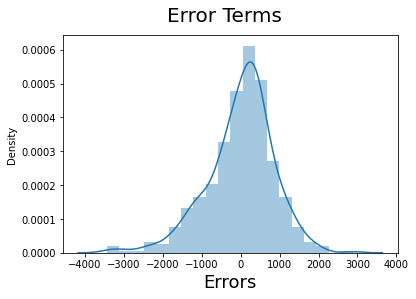

In [3783]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions Using the Final Model

In [3784]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [3785]:
y_test = df_test.pop('cnt')
X_test = df_test

In [3786]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'Dec', 'Jan', 'Nov', 'Sep', 'snow_rain'],
      dtype='object')

In [3787]:
# Now let's use our model to make predictions.
X_train_lm = X_train_lm.drop(['const'], axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [3788]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

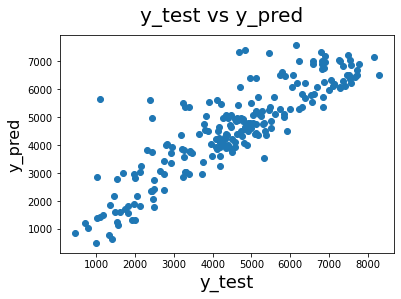

In [3789]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### If we use the second model we built, the adj R^2 of the RFE with n = 8 stands 71% adjusted R^2 and then we try the r2_score, we get : 0.702

### If we use the second model we built, the adj R^2 of the RFE with n = 15 stands 81% adjusted R^2 and then we try the r2_score, we get : 0.765

### If we use the manual selection, the adj R^2 = 79.8% ~ 80% , the r2_score = 0.756 

### Backward selection, the adj R^2 = 79.5% , the r2_score = 77%

### Finally we use the overall intersection of the variables in each one of them, with minimal model selection, the adj R2 = 78.5, the r2_score = 75.6%

In [3790]:
r2_score(y_true = y_test, y_pred = y_pred)

0.7651347765551815

### Although the best model was for the RFE based n = 15, but the difference between 81% and 76.5% is further than the backward selection we got which was 79.5 and 77%, for the data was much smaller than the regular data set, we could get the backward selection here, but with RFE we get close to the same variance.

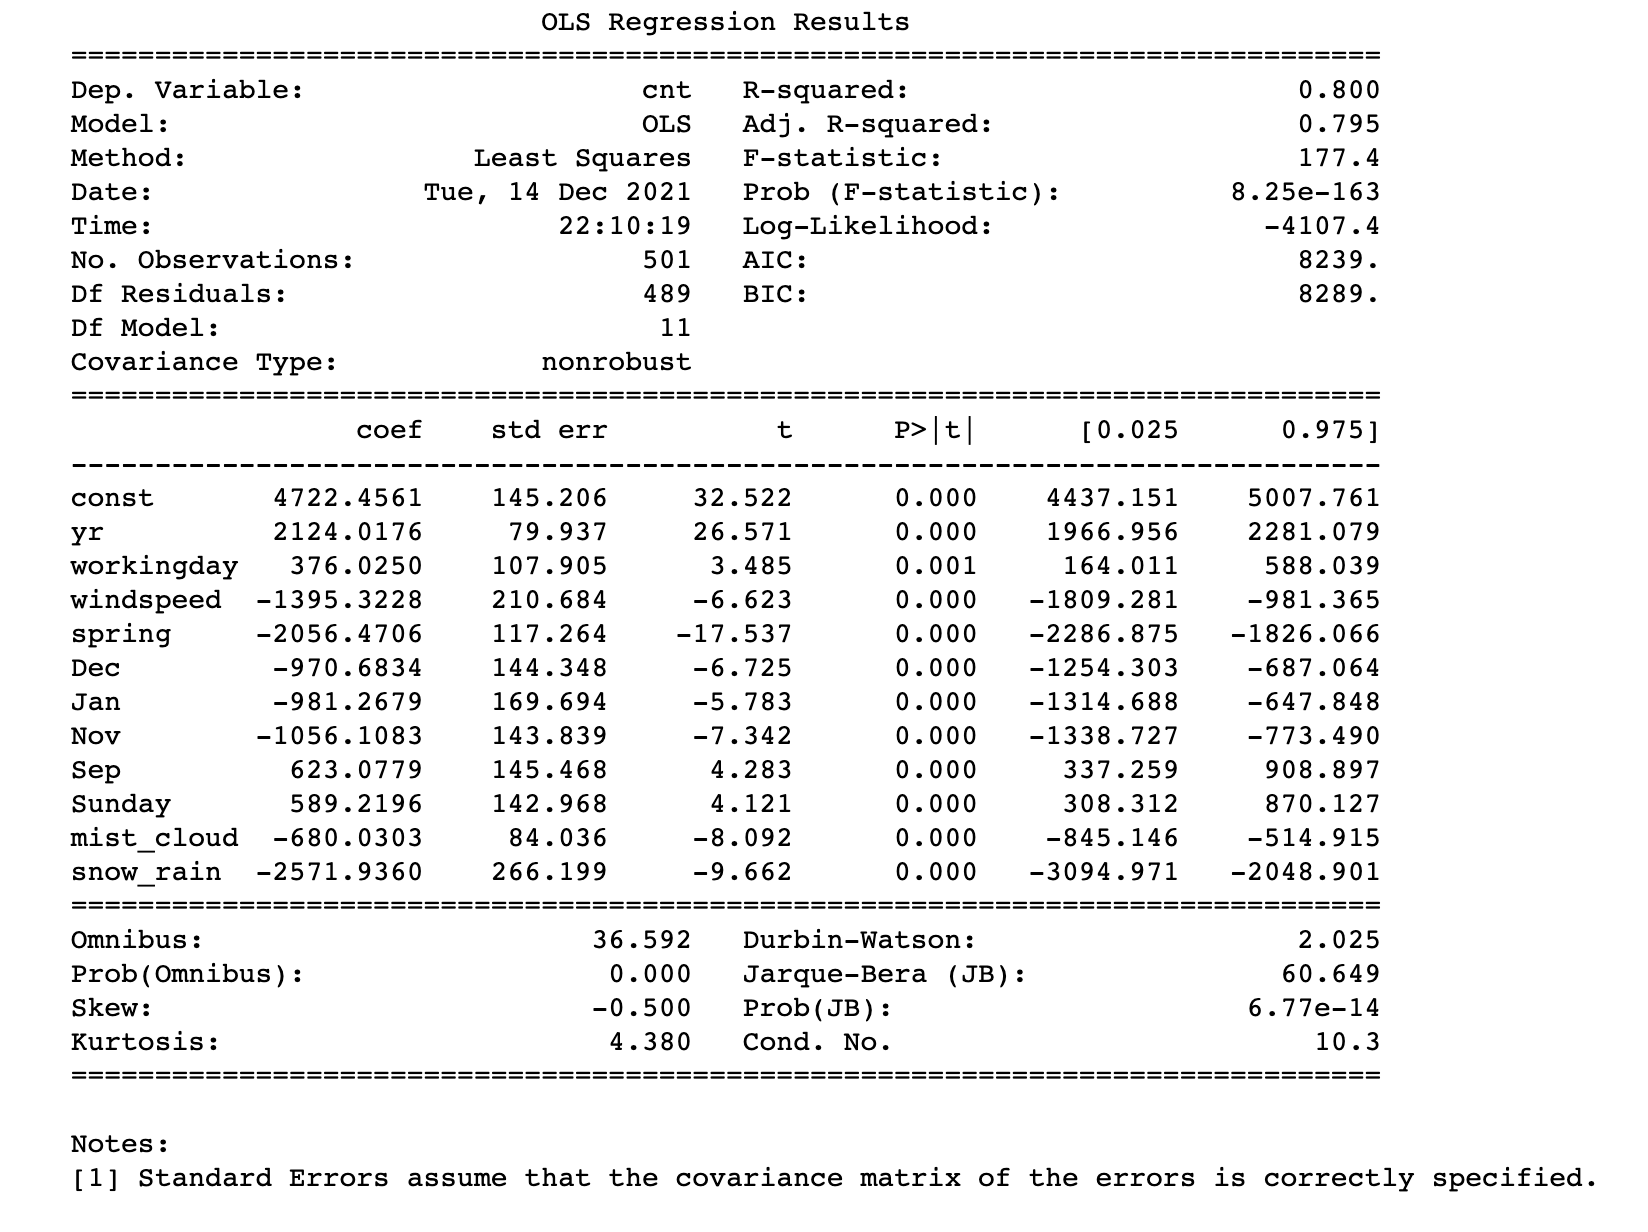

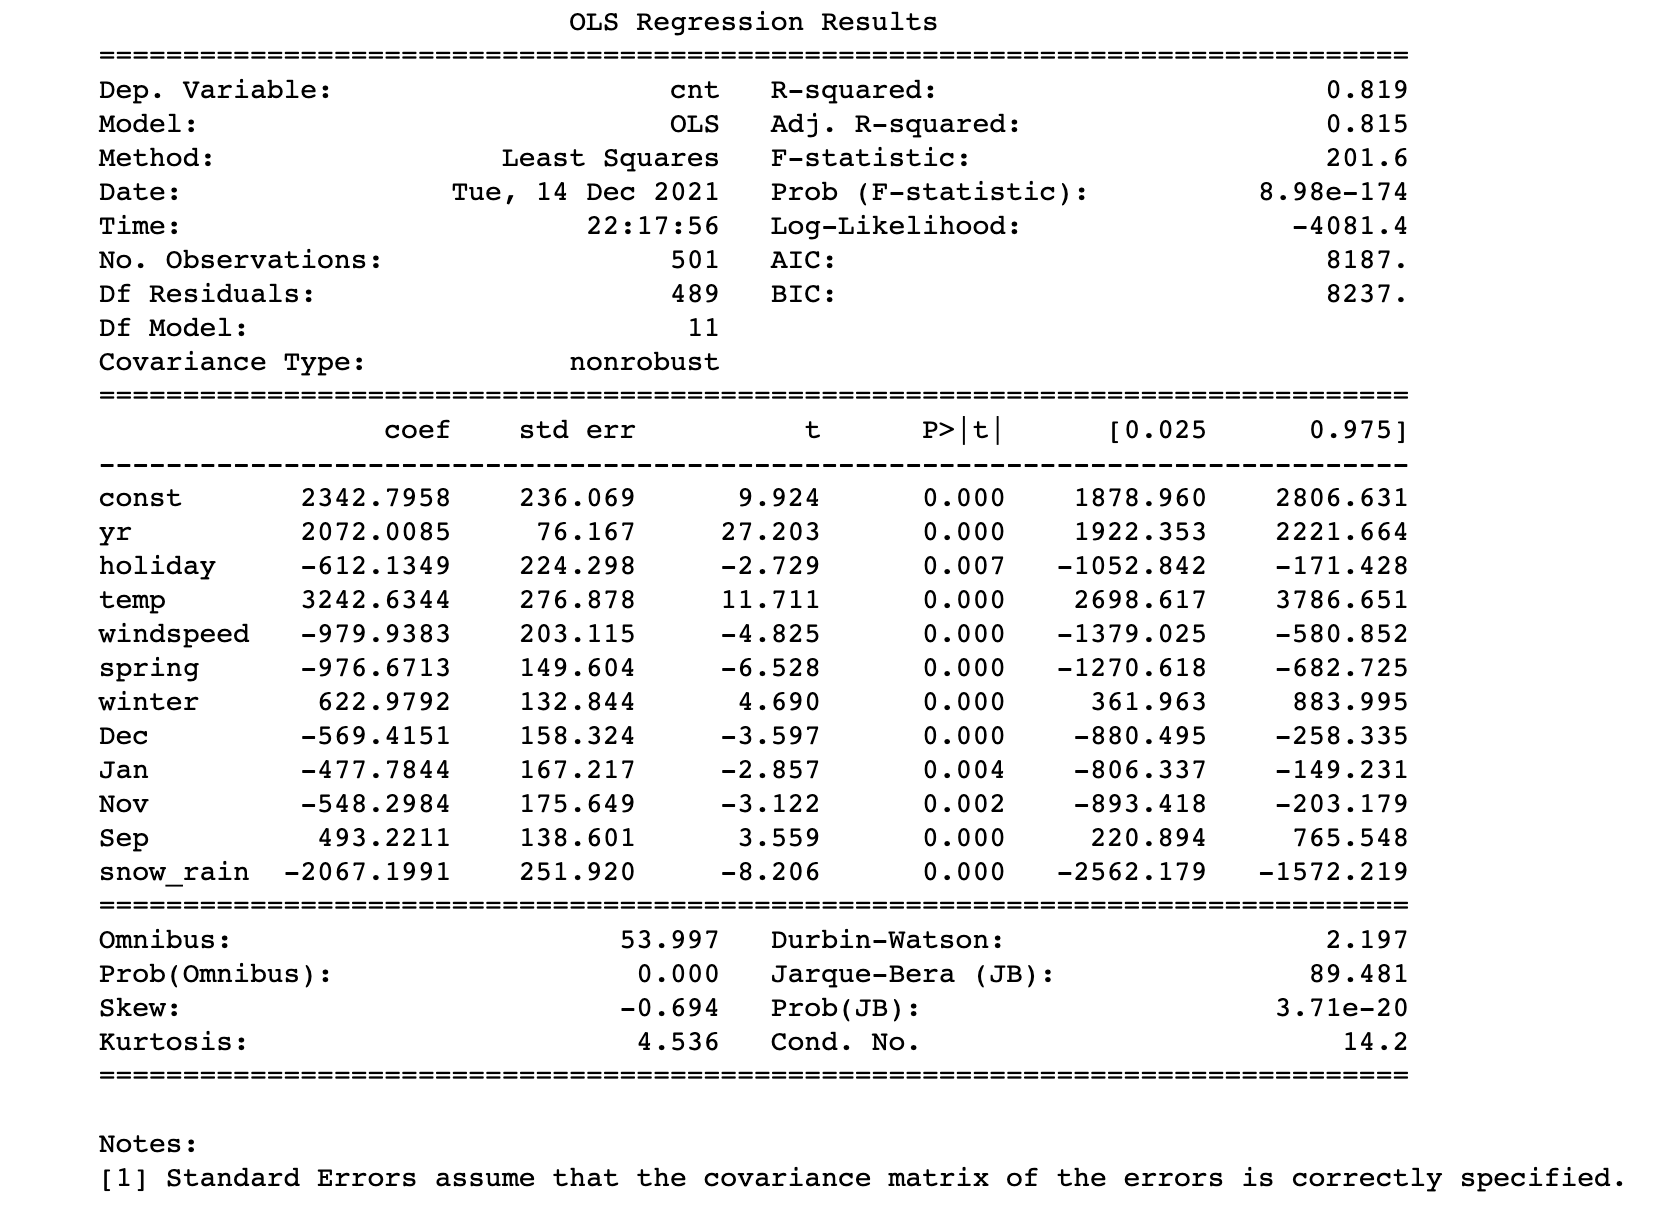

#### Explaining the above we can make sense of this model.

cnt = 2072*year + 3242*temp + 622*winter + 493*Sep + -612*holiday + -979*windspeed + -976*Spring + -569*Dec + -477*Nov + -2067*snow_rain + 2342

Now, sense about the data:
* Spring is not a great season and count is negetively effected whereas winter seems like a favorable time for cycle renting.
* Low windspeed, and no snow/rain/misty/cloud helps the count go up, so the weathersit should be clear and not much wind.
* Holiday is not a good time to cycle but Sundays can increase the count. (Holidays and Sundays are separate).
* Sep is a favorable month and Jan, Nov and December it might be snowing or vacation negetively affects the count.
* Temp increment favors cycling, which may be true for the cold areas.
* Year by year it seems people are favoring cycling as the petrol price may hike up.